##Here we analyse our rice_yield dataset using KMeans clustering



In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
from seaborn import set_style
from pandas.plotting import scatter_matrix
import os

set_style("whitegrid")

from sklearn.cluster import KMeans


In [83]:
rice_data = pd.read_csv('../Final_data/rice_yield.csv')

In [84]:

X = rice_data[['maxT_grow', 'maxT_harvest']].values

#the value k=5 is suggested by the scatter plot of (maxT_growth, maxT_harvest)
kmeans = KMeans(5)

kmeans.fit(X)

clusters = kmeans.predict(X)


In [85]:
kmeans.cluster_centers_

array([[29.25869591, 28.1152729 ],
       [15.50673292,  4.19043478],
       [25.71577177, 18.30313814],
       [33.61883938, 26.24016534],
       [32.824818  , 29.4477863 ]])

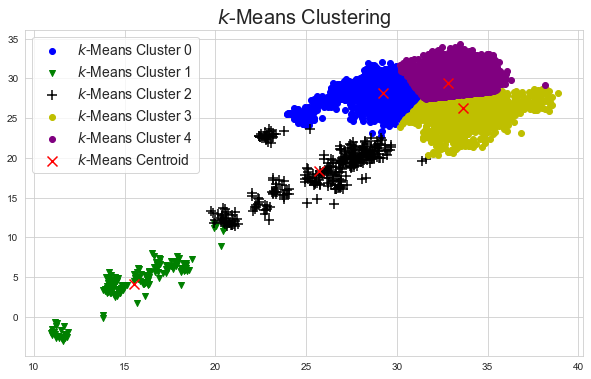

In [86]:
plt.figure(figsize=(10,6))

plt.scatter(X[clusters==0,0], X[clusters==0,1], c='b', label="$k$-Means Cluster 0")
plt.scatter(X[clusters==1,0], X[clusters==1,1], c='green', marker='v', label="$k$-Means Cluster 1")

plt.scatter(X[clusters==2,0], X[clusters==2,1], c='k', marker='+', s=100, label="$k$-Means Cluster 2")

plt.scatter(X[clusters==3,0], X[clusters==3,1], c='y',  label="$k$-Means Cluster 3")

plt.scatter(X[clusters==4,0], X[clusters==4,1], c='purple',  label="$k$-Means Cluster 4")

plt.scatter(kmeans.cluster_centers_[:,0], 
          kmeans.cluster_centers_[:,1], 
           c='r', marker='x', s=100, label='$k$-Means Centroid')

plt.legend(fontsize=14)
plt.title("$k$-Means Clustering", fontsize=20)

plt.show()

##### Updating rice_yield.csv 

by adding the columns "KM_clusterN_(maxT_growth_maxT_harvest)" that contains   the labels of the current clustering


In [100]:
rice_data = pd.DataFrame(rice_data)

rice_data["KM5_clusterN_(maxT_growth_maxT_harvest)"] = kmeans.labels_



In [101]:
rice_data = pd.DataFrame(rice_data)

rice_data["KM5_clusterN_(maxT_growth_maxT_harvest)"] = kmeans.labels_

rice_data[rice_data["KM5_clusterN_(maxT_growth_maxT_harvest)"] == 1]

rice_data.to_csv('../Final_data/rice_yield.csv')

## Justification that k=5 is a reasonable choice demonstrated by the elbow method

In [98]:
inertias = []

for k in range(1,11):
    kmeans = KMeans(k)
    kmeans.fit(X)
    
   
    inertias.append(kmeans.inertia_)

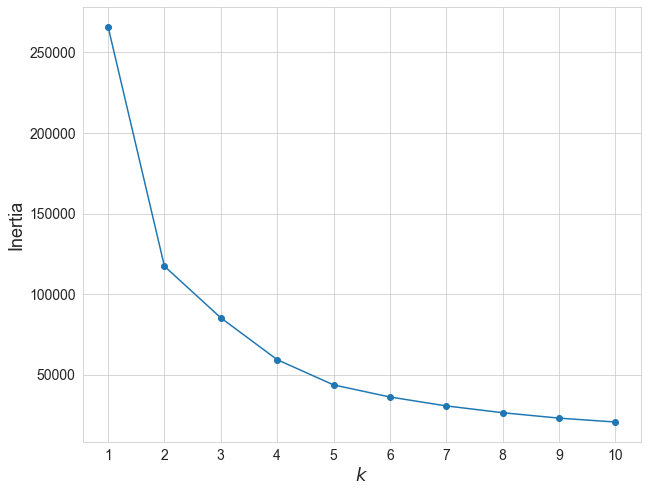

In [99]:
plt.figure(figsize=(10,8))

plt.plot(range(1,11), inertias, '-o')

plt.xlabel("$k$", fontsize=18)
plt.ylabel("Inertia", fontsize=18)

plt.xticks(range(1,11),fontsize=14)
plt.yticks(fontsize=14)

plt.show()